In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression as LR
from sklearn.preprocessing import MinMaxScaler as mm
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [4]:
admission_pred = pd.read_csv(r"admission.csv")
admission_pred

,admit,toefl,rating,sop,lor,gpa,research,gre
0,1,118,4,4.5,4.5,9.65,1,337
1,1,107,4,4.0,4.5,8.87,1,324
2,0,104,3,3.0,3.5,8.00,1,316
3,1,110,3,3.5,2.5,8.67,1,322
4,0,103,2,2.0,3.0,8.21,0,314
...,...,...,...,...,...,...,...,...
395,1,110,3,3.5,3.5,9.04,1,324
396,1,107,3,3.0,3.5,9.11,1,325
397,1,116,4,5.0,4.5,9.45,1,330
398,0,103,3,3.5,4.0,8.78,0,312


<AxesSubplot:>

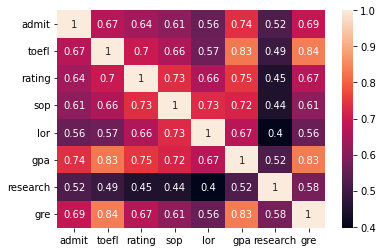

In [33]:
sns.heatmap(admission_pred.corr(), annot=True)

In [6]:
scaler = mm()
admission_pred[["toefl","rating","sop","lor","gpa","gre"]] = scaler.fit_transform(
    admission_pred[["toefl","rating","sop","lor","gpa","gre"]])
admission_pred

,admit,toefl,rating,sop,lor,gpa,research,gre
0,1,0.928571,0.75,0.875,0.875,0.913462,1,0.94
1,1,0.535714,0.75,0.750,0.875,0.663462,1,0.68
2,0,0.428571,0.50,0.500,0.625,0.384615,1,0.52
3,1,0.642857,0.50,0.625,0.375,0.599359,1,0.64
4,0,0.392857,0.25,0.250,0.500,0.451923,0,0.48
...,...,...,...,...,...,...,...,...
395,1,0.642857,0.50,0.625,0.625,0.717949,1,0.68
396,1,0.535714,0.50,0.500,0.625,0.740385,1,0.70
397,1,0.857143,0.75,1.000,0.875,0.849359,1,0.80
398,0,0.392857,0.50,0.625,0.750,0.634615,0,0.44


In [7]:
X=admission_pred.drop("admit",axis=1)
y=admission_pred["admit"]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
lr = LR()

In [10]:
lr.fit(X_train,y_train)

LogisticRegression()

In [11]:
y_pred = lr.predict(X_test)

In [12]:
print(y_pred)
print(np.array(y_test))
c_matrix = cm(y_test,y_pred) 
print(c_matrix)

[0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0
 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0]
[0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0
 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1]
[[48  8]
 [11 33]]


In [13]:
accuracy_score(y_test, y_pred)

0.81

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        56
           1       0.80      0.75      0.78        44

    accuracy                           0.81       100
   macro avg       0.81      0.80      0.81       100
weighted avg       0.81      0.81      0.81       100



In [15]:
lr.score(X_train, y_train)

0.88

In [16]:
np.array(y_test)
y_test_array=np.array(y_test)
y_test_array

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [17]:
y_test_array.shape

(100,)

In [19]:
y_pred_array=np.array(y_pred)

In [20]:
print(y_pred_array)
print(np.array(y_test_array))
c_matrix = cm(y_test_array,y_pred_array) 
print(c_matrix)

[0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0
 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0]
[0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0
 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1]
[[48  8]
 [11 33]]


In [21]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.43588989435406733


In [35]:
test = [[0.89,1,1.275,0.7,0.9,1,0.98]]
test2 = [[0.34, 0.4, 0.3, 0.2, 0.4, 1, 0.3]]

In [36]:
a = lr.predict(test)
b = lr.predict(test2)
print(a)
print(b)

[1]
[0]
